# <center>Project-Based Assignment CLO-4</center>


<b>Topik</b>
Implementation random forest classifier untuk memprediksi popularitas berita online

<b>Anggota Kelompok</b>
1. Athalia Malika Najah - 1301213226
2. Dzaki Afin Firdaus - 1301213004
3. Muhammad Munzir - 1301213167

#### Latar Belakang
Random Forest adalah algoritma pembelajaran mesin yang digunakan untuk memprediksi sesuatu berdasarkan banyak faktor. Dalam proyek ini, kami mencoba memprediksi popularitas berita online dengan bantuan random forest, hasil model dievaluasi menggunakan metrik seperti akurasi, f1 score, dan AUC

import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read the CSV file directly from the updated URL
df = pd.read_csv('OnlineNewsPopularity.csv')


In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.shape

(39644, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
# removing duplicates
df=df.drop_duplicates()

In [ ]:
df.shape  # tanpa data duplikat

(39644, 61)

Eksplorasi Data

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


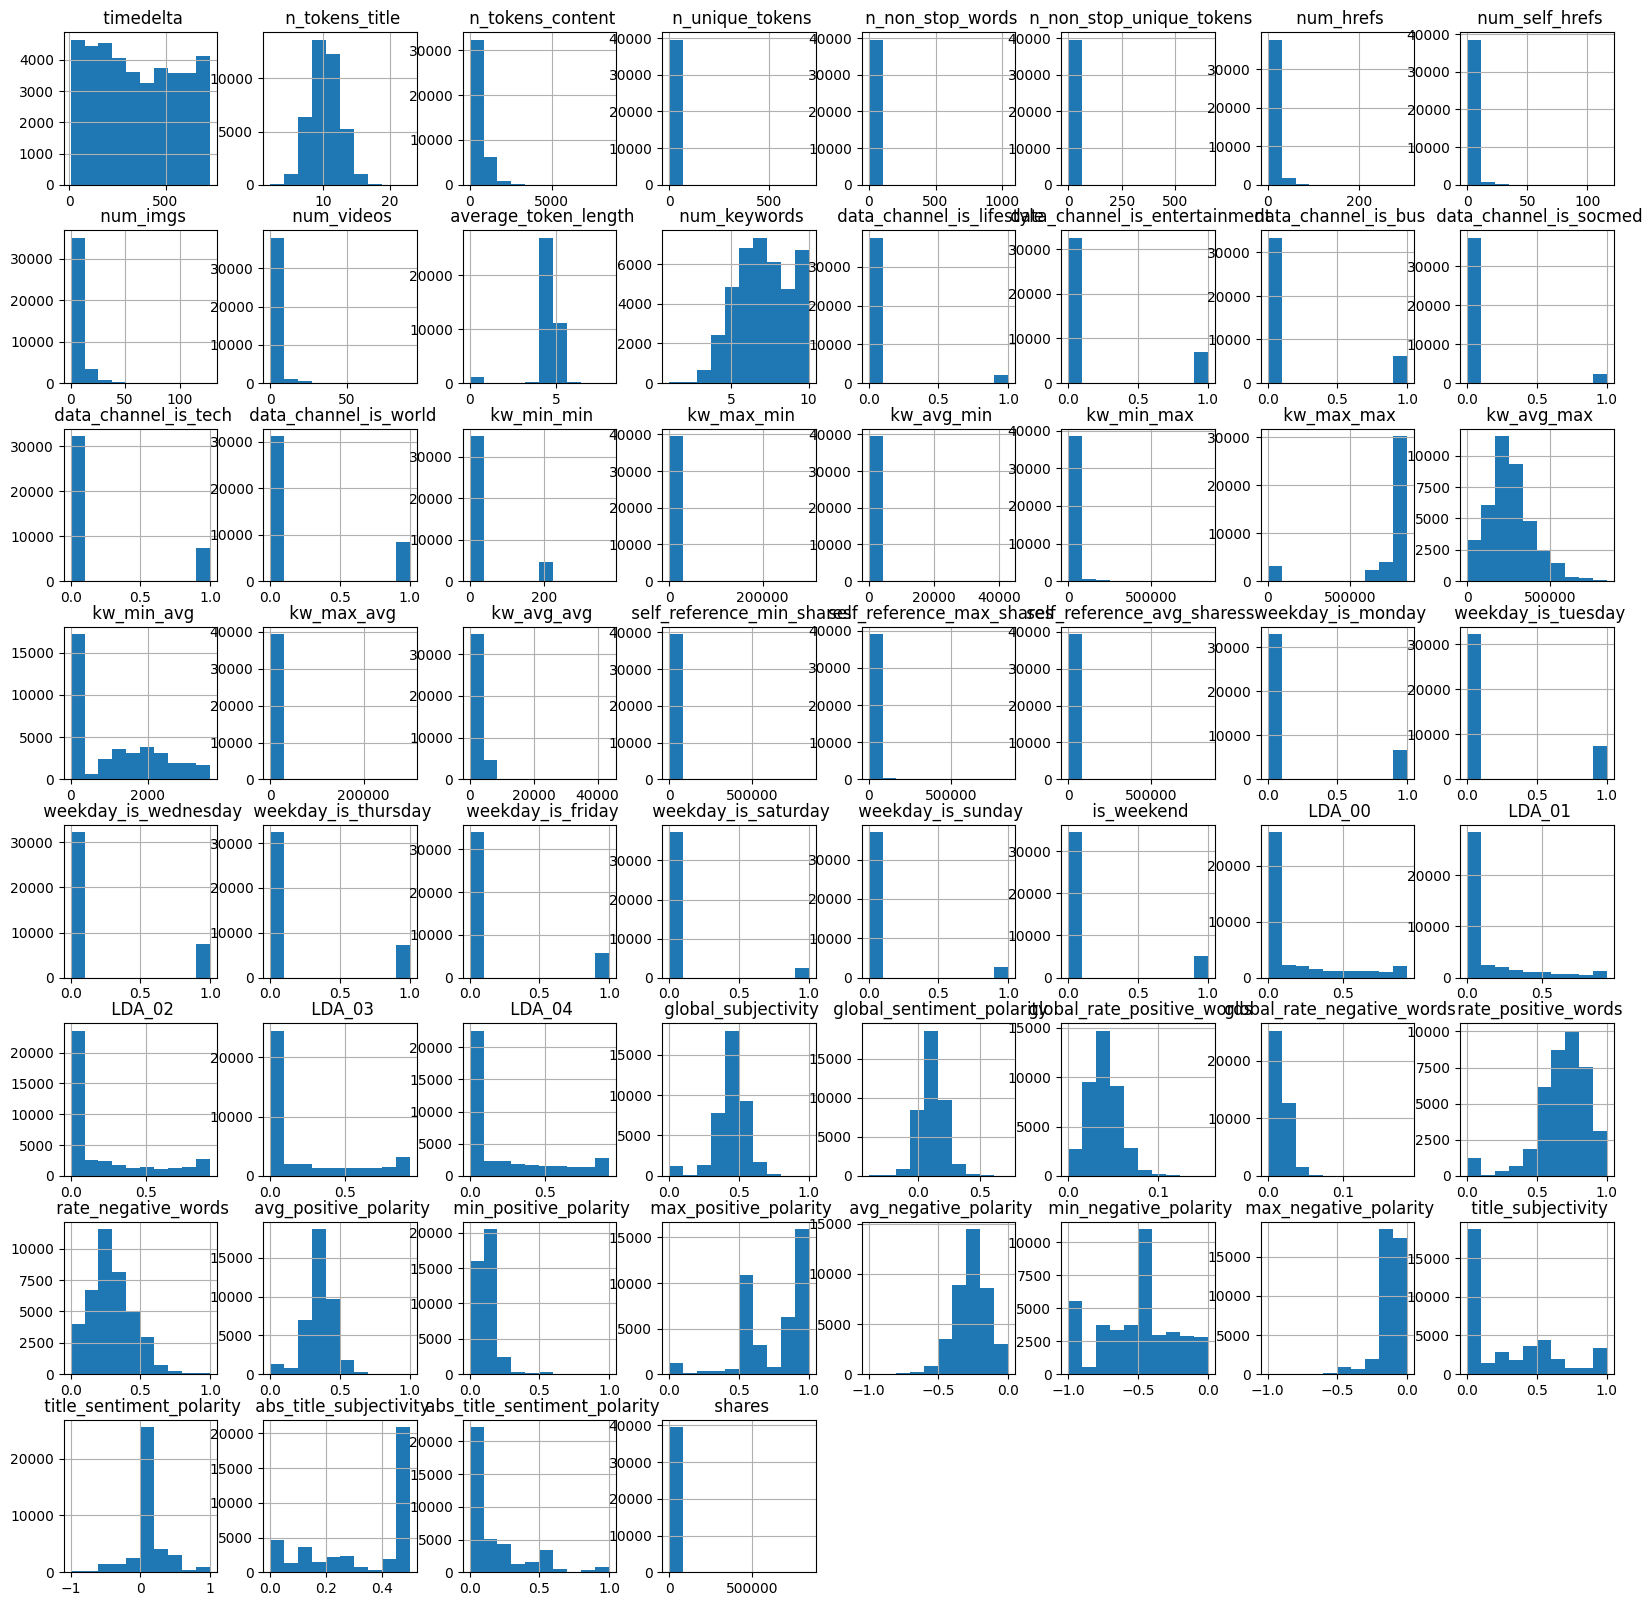

In [ ]:
df.hist(figsize=(20,20))
plt.show()

<ipython-input-12-d45ee8e5f0eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()
<ipython-input-12-d45ee8e5f0eb>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<Axes: >

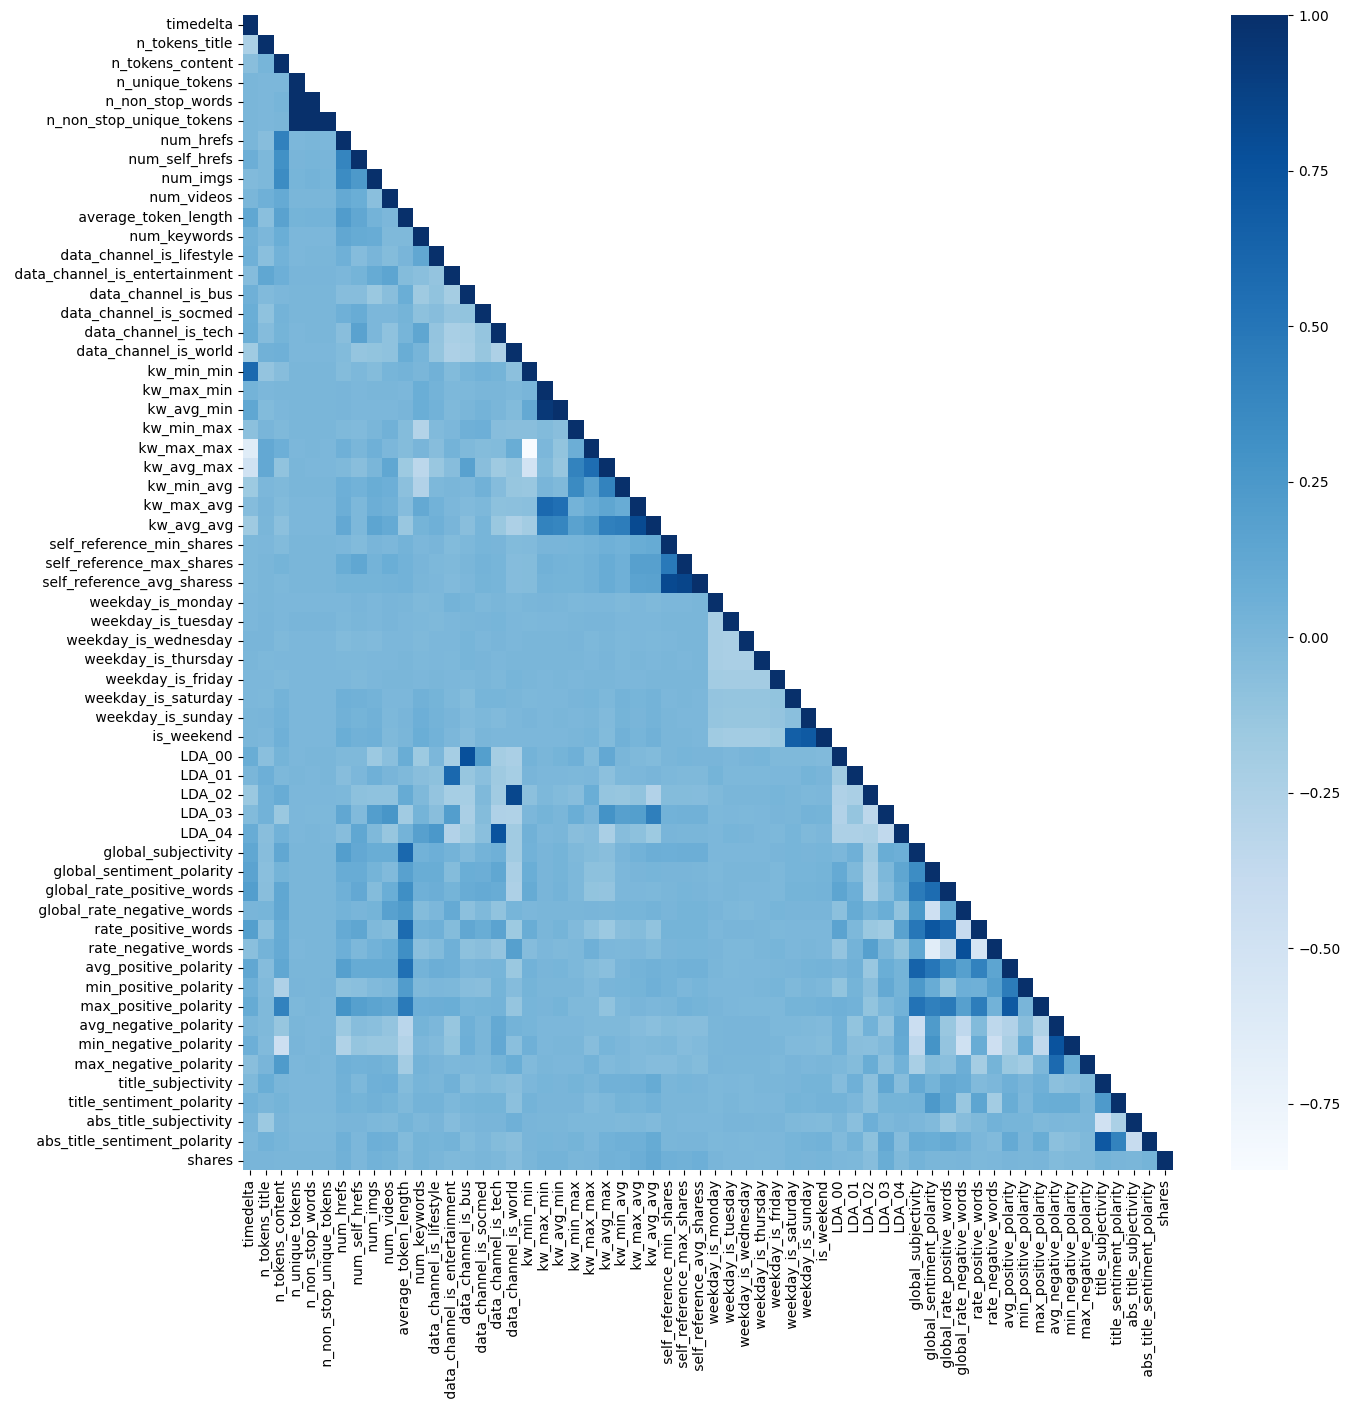

In [ ]:
cor=df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [ ]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [ ]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

# Drop these items or rows with n_tokens_content = 0

df = df[df['n_tokens_content'] != 0]

number of news items with no words 1181


In [ ]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [ ]:
#Understanding target variable distribution
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

Mean article shares = 3355.3603983048642
Median article share = 1400.0


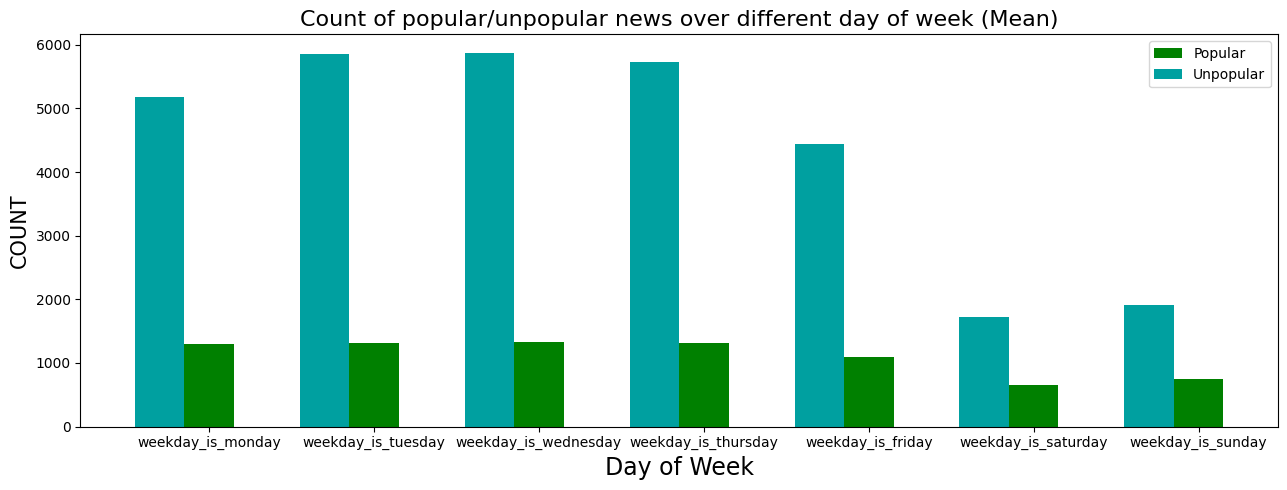

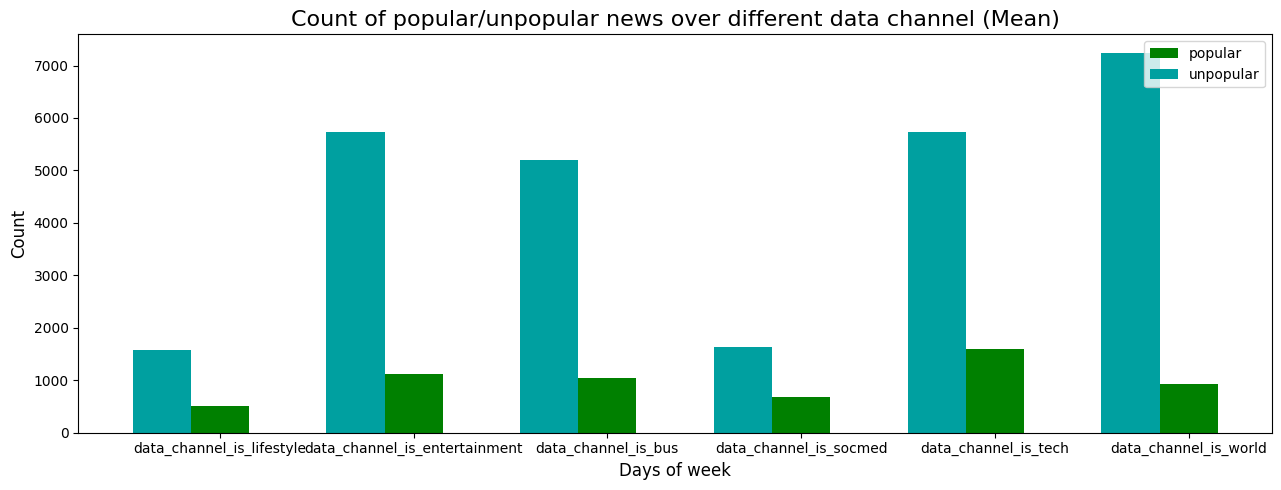

In [ ]:
a,b = df['shares'].mean(),df['shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')
Dc=df.columns[9:15]
Wday = df.columns.values[26:33]

Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)


#for i, v in enumerate(Pop_day):
#    fig.text(i+25,
#              v/Pop_day[i]+50,
#              Pop_day[i],
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

Scaling DataSet

In [ ]:
# df2_num  dataframe contains numerical feaures.

df2_num= df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagorical features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [ ]:
df2_num = df2_num.drop('shares',axis=1)

In [ ]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'k

In [ ]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [ ]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

#Treating outlier :

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [ ]:
df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [ ]:
df2_num_add.columns
df2_cat.columns
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [ ]:
df_final=df_final.dropna()

In [ ]:
print(df_final.columns)


Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

Ringkasan Metode(Baseline)

In [ ]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score, roc_auc_score

# Drop columns and define X, y
X = df_final.drop(['popularity'], axis=1)
y = df_final['popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=0)

# Train and predict using the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy, F-score, and AUC
accuracy = accuracy_score(y_test, y_pred)
f1 = fbeta_score(y_test, y_pred, beta=1)
auc = roc_auc_score(y_test, y_pred)

# Display the performance metrics
print(f"Accuracy Score: {accuracy}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")


Accuracy Score: 0.6125367548783748
F1 Score: 0.6542635658914728
AUC: 0.6071619530222602


Perform GridSearchCV to Find Best Parameters


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


Random Forest Classifier with Best Parameters

In [40]:
# Initialize the Random Forest Classifier with best parameters
clf_best_params = RandomForestClassifier(random_state=0, **best_params)

# Train the classifier on the entire dataset
clf_best_params.fit(X, y)

# Evaluate performance
y_pred_best_params = clf_best_params.predict(X_test)

# Calculate metrics using the best parameters
accuracy_best_params = accuracy_score(y_test, y_pred_best_params)
f1_best_params = fbeta_score(y_test, y_pred_best_params, beta=1)
auc_best_params = roc_auc_score(y_test, y_pred_best_params)

# Display performance metrics
print("Performance Metrics using Best Parameters:")
print(f"Accuracy Score: {accuracy_best_params}")
print(f"F1 Score: {f1_best_params}")
print(f"AUC: {auc_best_params}")

Performance Metrics using Best Parameters:
Accuracy Score: 0.9764705882352941
F1 Score: 0.9781420765027322
AUC: 0.9756072135932452


Random Forest Classifier with SMOTE and Best Parameters

In [41]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

# Initialize the Random Forest Classifier with best parameters
clf_best_params_smote = RandomForestClassifier(random_state=0, **best_params)

# Train the classifier on the balanced data
clf_best_params_smote.fit(X_smote, y_smote)

# Evaluate performance
y_pred_best_params_smote = clf_best_params_smote.predict(X_test)

# Calculate metrics using the best parameters and SMOTE
accuracy_best_params_smote = accuracy_score(y_test, y_pred_best_params_smote)
f1_best_params_smote = fbeta_score(y_test, y_pred_best_params_smote, beta=1)
auc_best_params_smote = roc_auc_score(y_test, y_pred_best_params_smote)

# Display performance metrics with SMOTE
print("Performance Metrics with SMOTE using Best Parameters:")
print(f"Accuracy Score: {accuracy_best_params_smote}")
print(f"F1 Score: {f1_best_params_smote}")
print(f"AUC: {auc_best_params_smote}")

Performance Metrics with SMOTE using Best Parameters:
Accuracy Score: 0.9647058823529412
F1 Score: 0.9662921348314607
AUC: 0.9657041592828104


Random Forest Classifier with MinMaxScaler and Best Parameters

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the Random Forest Classifier with best parameters
clf_best_params_scaled = RandomForestClassifier(random_state=0, **best_params)

# Train the classifier on the normalized data
clf_best_params_scaled.fit(X_normalized, y)

# Normalize the test data and evaluate performance
X_test_normalized = scaler.transform(X_test)
y_pred_best_params_scaled = clf_best_params_scaled.predict(X_test_normalized)

# Calculate metrics using the best parameters and scaled data
accuracy_best_params_scaled = accuracy_score(y_test, y_pred_best_params_scaled)
f1_best_params_scaled = fbeta_score(y_test, y_pred_best_params_scaled, beta=1)
auc_best_params_scaled = roc_auc_score(y_test, y_pred_best_params_scaled)

# Display performance metrics with MinMaxScaler
print("Performance Metrics with MinMaxScaler using Best Parameters:")
print(f"Accuracy Score: {accuracy_best_params_scaled}")
print(f"F1 Score: {f1_best_params_scaled}")
print(f"AUC: {auc_best_params_scaled}")

Performance Metrics with MinMaxScaler using Best Parameters:
Accuracy Score: 0.9823529411764705
F1 Score: 0.9835164835164836
AUC: 0.9818965217693457


Visualisasi Perbandingan 3 skema model

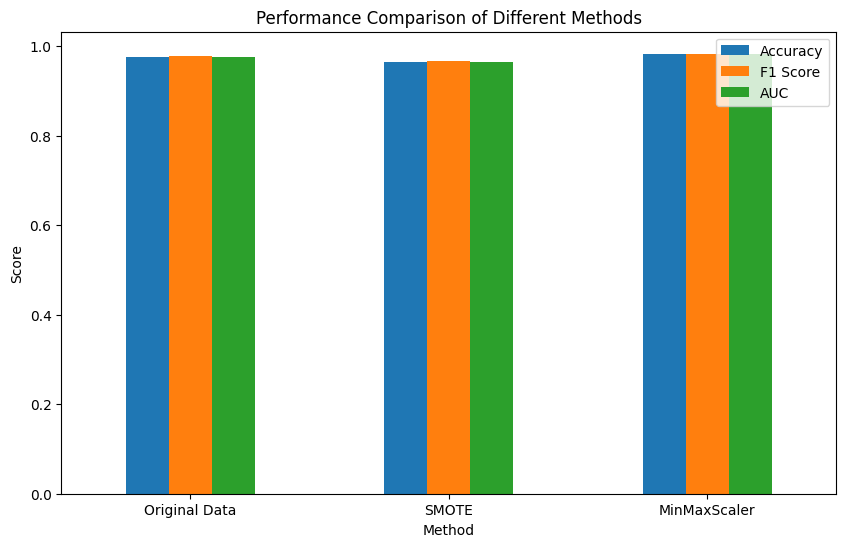

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the results
results_summary = pd.DataFrame({
    'Method': ['Original Data', 'SMOTE', 'MinMaxScaler'],
    'Accuracy': [accuracy_best_params, accuracy_best_params_smote, accuracy_best_params_scaled],
    'F1 Score': [f1_best_params, f1_best_params_smote, f1_best_params_scaled],
    'AUC': [auc_best_params, auc_best_params_smote, auc_best_params_scaled]
})

# Visualize the performance metrics using a bar plot
results_summary.set_index('Method').plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison of Different Methods')
plt.xlabel('Method')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

#### Hasil dan Analisis
Dalam eksperimen Random Forest yang dilakukan, pertama, penggunaan GridSearchCV membantu menemukan parameter terbaik untuk model. Kemudian, model diterapkan dalam tiga pendekatan yang berbeda: penggunaan data asli, data yang seimbang menggunakan SMOTE, dan data yang dinormalisasi dengan MinMaxScaler. Hasil evaluasi menunjukkan bahwa penggunaan parameter terbaik pada data yang dinormalisasi menghasilkan kinerja terbaik, dengan tingkat akurasi, F1 Score, dan AUC yang lebih tinggi dibandingkan dengan dua pendekatan lainnya. Ini menunjukkan bahwa pra-pemrosesan data dengan normalisasi dapat meningkatkan performa model Random Forest dalam klasifikasi dataset yang digunakan.

#### Kesimpulan
Penerapan metode Random Forest untuk memprediksi popularitas berita online menunjukkan hasil yang menjanjikan. Melalui eksperimen dengan variasi pendekatan seperti penyesuaian parameter terbaik, penggunaan data seimbang dengan SMOTE, dan normalisasi data dengan MinMaxScaler, dapat disimpulkan bahwa normalisasi data memberikan hasil terbaik dengan tingkat akurasi, F1 Score, dan AUC yang lebih tinggi. Hal ini menegaskan bahwa pra-pemrosesan data memegang peran penting dalam meningkatkan kemampuan model untuk mengklasifikasikan popularitas berita online dengan lebih baik, dan Random Forest merupakan pilihan yang kuat untuk tugas prediksi pada dataset ini, terutama ketika dilakukan pra-pemrosesan yang tepat.